In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astroquery.vizier import Vizier
from matplotlib  import cm
from itertools import combinations
from uncertainties import ufloat
from uncertainties.umath import *

%matplotlib inline
#plt.rcParams['figure.figsize']=[40,10]

## Read in etalon fits

In [2]:
thickness = []
wavelengths = []
dates = []
calendar = []

dirname = '/Users/tgardner/etalon_epochs/good_epochs/'
for file in os.listdir(dirname):
    
    if file.endswith("cphase.txt") or file.endswith("phases.txt"):
        filename = os.path.join(dirname, file)
        f = open(filename)
        lines = f.readlines()

        fit=[]
        for item in lines[4].split()[:6]:
            if item == '--':
                fit.append(np.nan)
            else:
                fit.append(float(item))
                
        thickness.append(fit)
        dates.append(lines[3].split()[1])
        calendar.append(lines[3].split()[0])
        wavelengths.append([float(i) for i in lines[5].split()])
        f.close()
        
thickness = np.array(thickness)
wavelengths = np.array(wavelengths)
dates = np.array(dates)
calendar = np.array(calendar)

/var/folders/jd/4t86pk8n2kz7t27v4t2z1jy407ly1g/T/ipykernel_2556/3529835590.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  wavelengths = np.array(wavelengths)


In [3]:
print(thickness.shape)

(136, 6)


In [4]:
## sort arrays by date
idx = np.argsort(dates)

dates=dates[idx]
thickness=thickness[idx]
wavelengths=wavelengths[idx]
calendar=calendar[idx]

In [5]:
## want differences, not thickness
diff=[]

## get order of opds
idx = [abs(i-j) for i,j in combinations(thickness[0],2)]
ind = np.argsort(idx)

for item in thickness:
    d = [abs(i-j) for i,j in combinations(item,2)]
    diff.append(np.array(d)[ind])
    
diff=np.array(diff)

In [6]:
print(thickness[0])
print(diff[0])
print(calendar)

[6.58492216e-06 3.03392825e-05 0.00000000e+00 1.87426236e-05
 2.48626964e-05 1.26379006e-05]
[5.47658614e-06 6.05297844e-06 6.10472300e-06 6.12007277e-06
 6.58492216e-06 1.15966589e-05 1.21577014e-05 1.22247958e-05
 1.26379006e-05 1.77013819e-05 1.82777742e-05 1.87426236e-05
 2.37543603e-05 2.48626964e-05 3.03392825e-05]
['2017Sep28_SKY' '2017Sep29_SKY' '2017Oct01_SKY' '2018Feb09_SKY'
 '2018Apr15' '2018May28_SKY' '2018May30' '2018Jul18_SKY' '2018Jul19_SKY'
 '2018Aug20_SKY' '2018Sep18_SKY' '2018Sep19_SKY' '2018Sep20_SKY'
 '2018Oct22_SKY' '2018Oct23_SKY' '2018Nov21_SKY' '2018Dec04_SKY'
 '2019May10_STS' '2019May11_STS' '2019Jun01_STS' '2019Jun02_STS'
 '2019Jun03_STS' '2019Jul27_PRISM' '2019Jul29_STS' '2019Jul30_STS'
 '2019Jul31_STS' '2019Aug01_STS' '2019Aug06_STS' '2019Aug07_STS'
 '2019Aug08_STS' '2019Sep06_STS' '2019Sep08_STS' '2019Sep10_STS'
 '2019Sep11_STS' '2019Sep14' '2019Sep15' '2019Sep25_STS' '2019Oct13_STS'
 '2019Oct14_STS' '2019Nov11_STS' '2019Nov12_STS' '2019Nov13_STS'
 '2019Dec

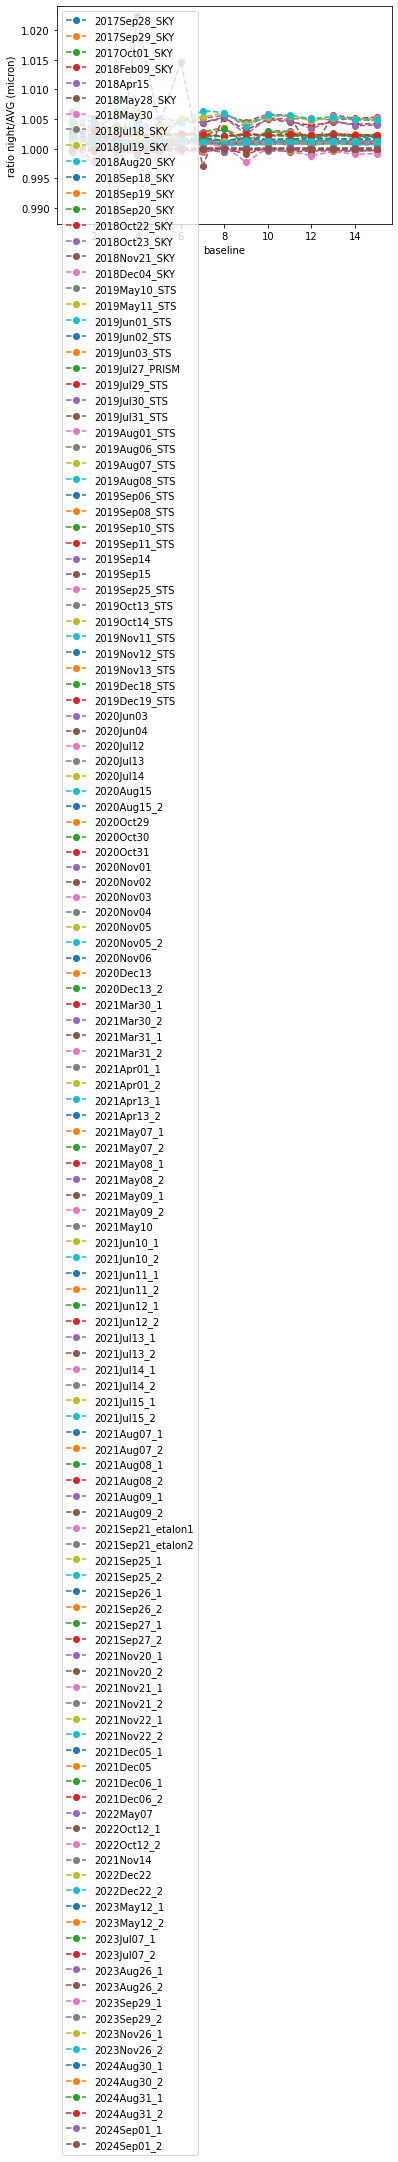

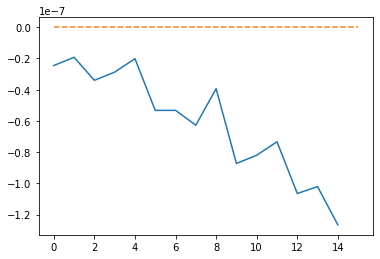

In [7]:
## each etalon separately - micron fit
#diff_avg = np.nanmean(diff,axis=0)
diff_avg = diff[-1]

for item,d in zip(diff,calendar):
    ratio = item / diff_avg
    plt.plot(np.linspace(1,len(ratio),len(ratio)),ratio,'o--',label='%s'%d)
plt.xlabel('baseline')
plt.ylabel('ratio night/AVG (micron)')
plt.legend()
plt.show()

plt.plot(diff_avg - diff[3])
plt.plot([0,15],[0,0],'--')
plt.show()

In [8]:
print(diff.shape)
print(diff_avg.shape)

(136, 15)
(15,)


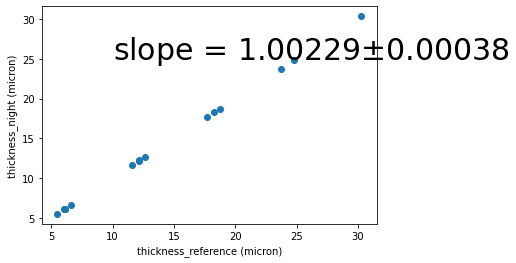

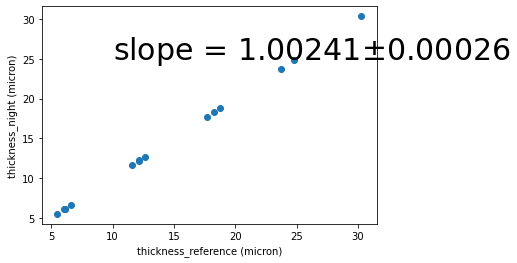

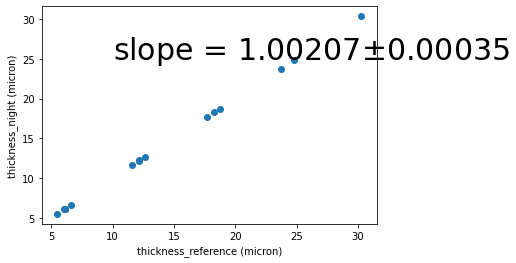

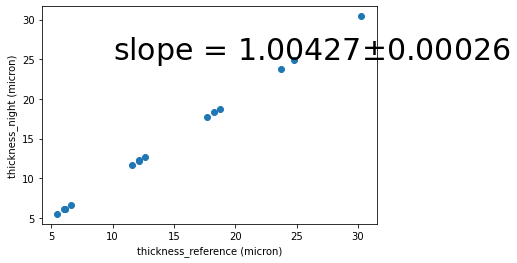

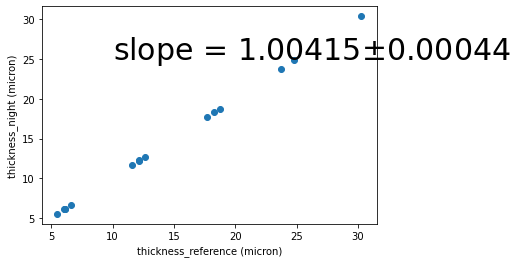

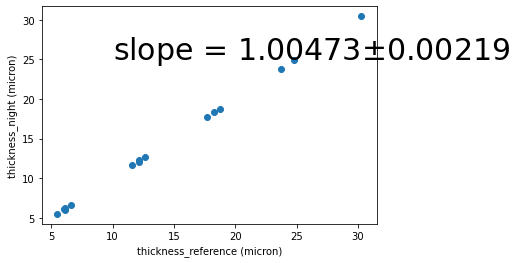

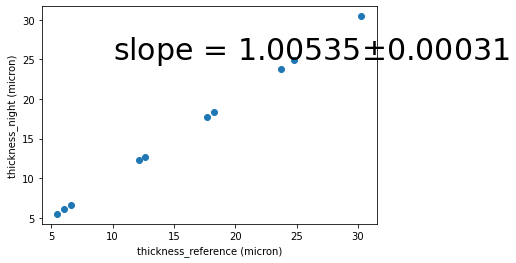

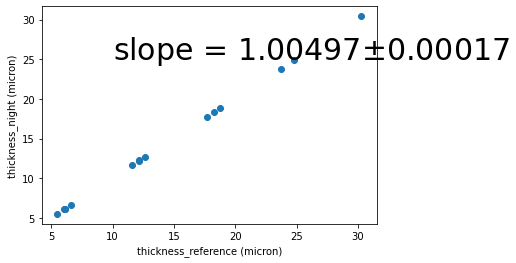

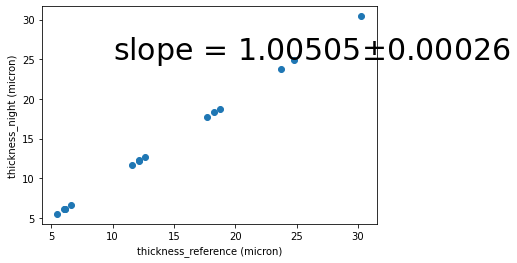

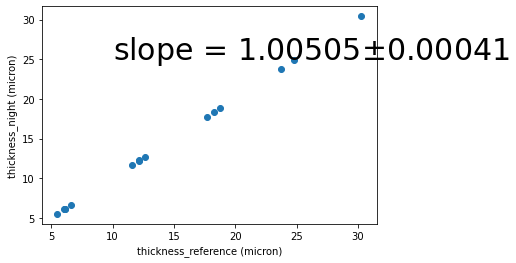

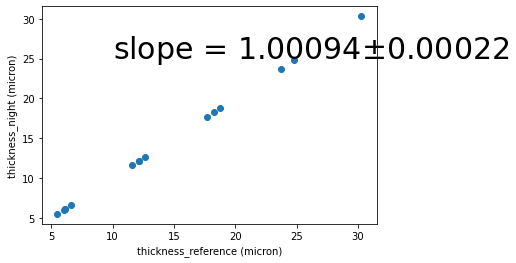

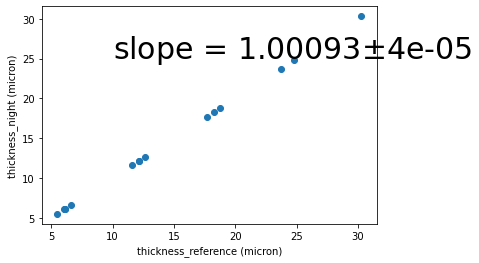

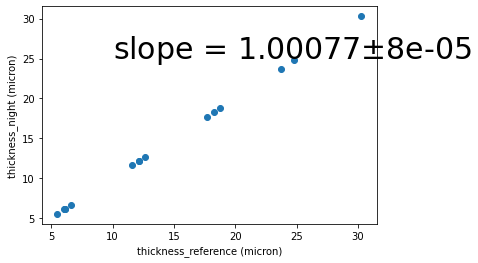

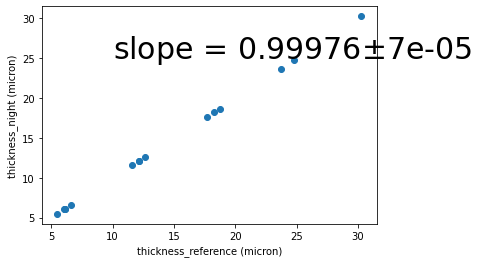

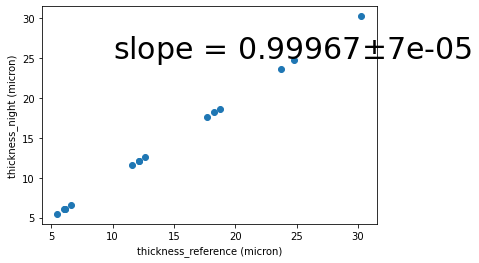

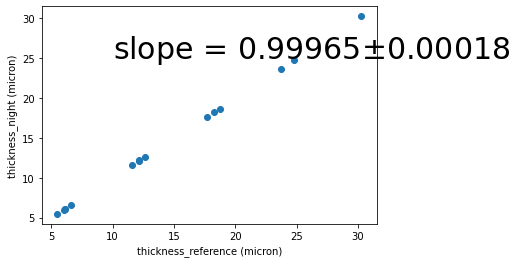

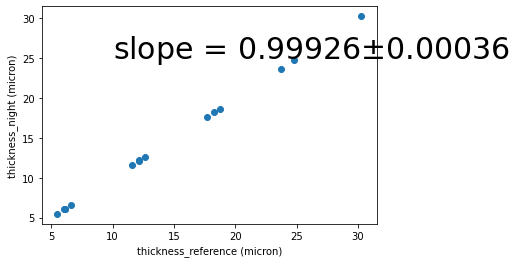

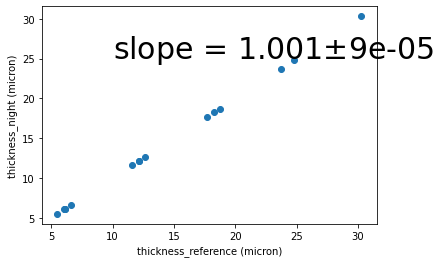

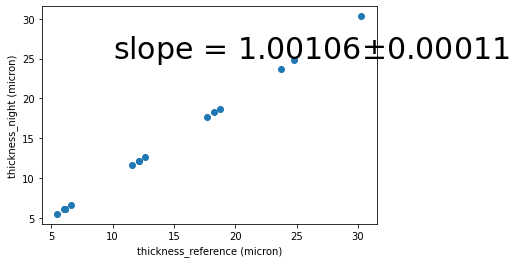

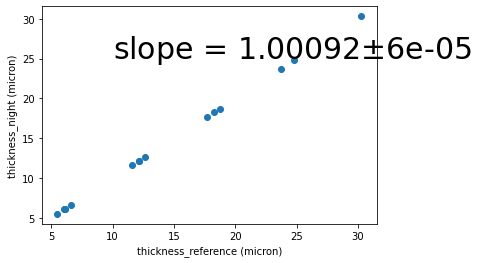

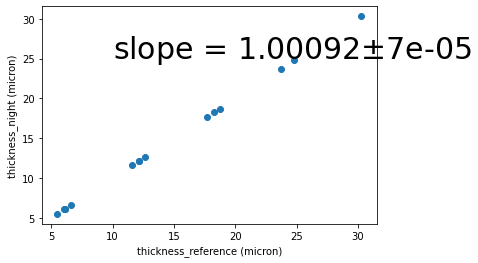

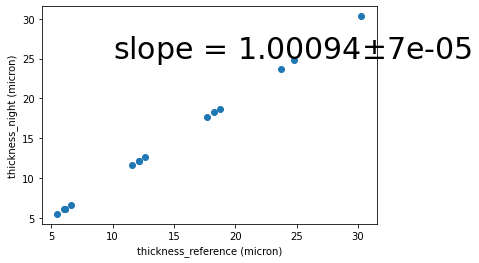

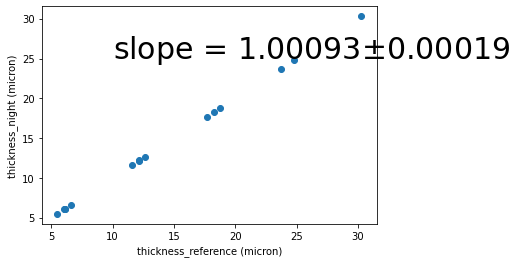

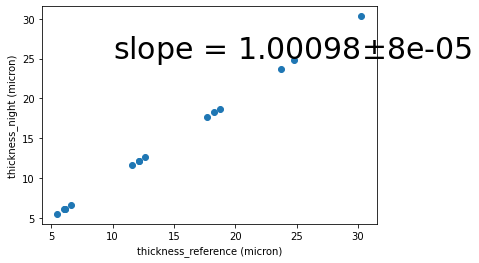

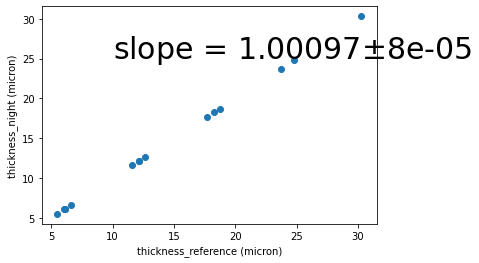

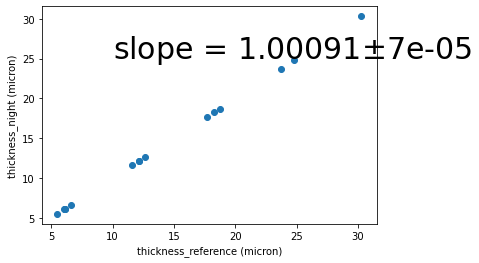

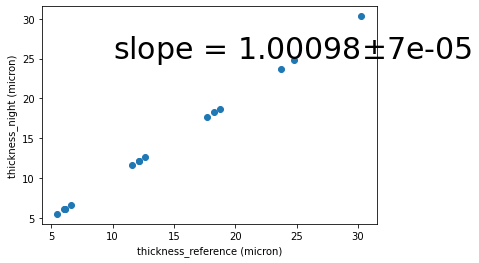

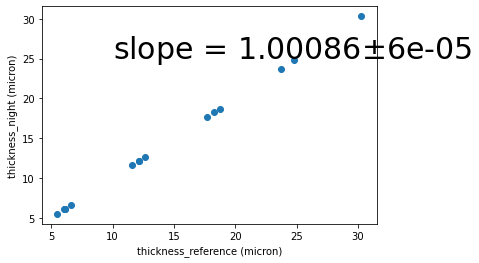

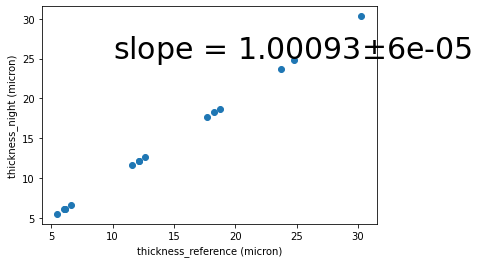

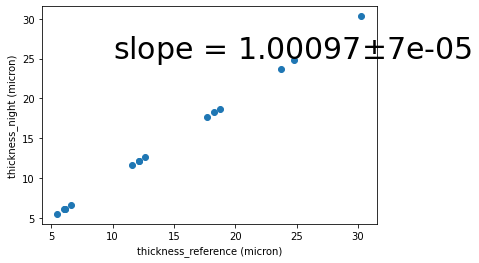

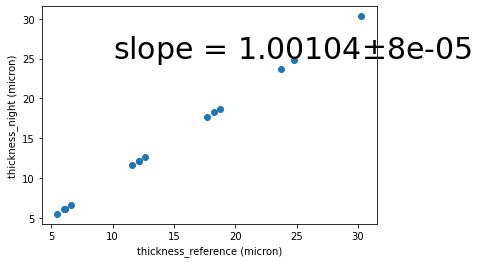

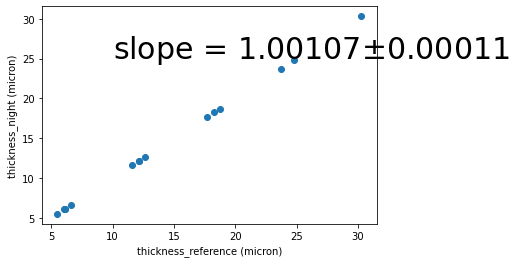

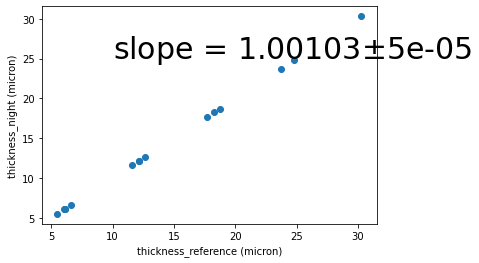

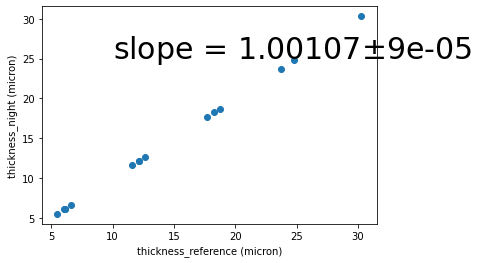

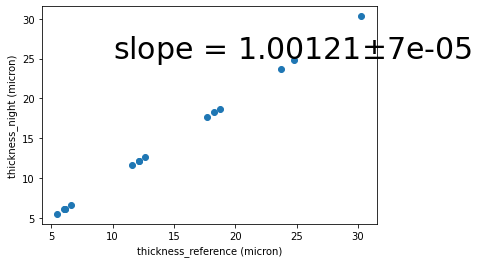

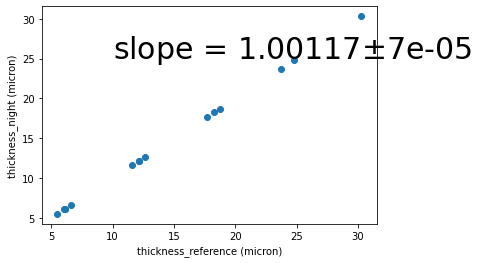

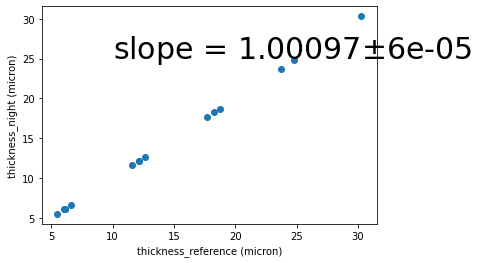

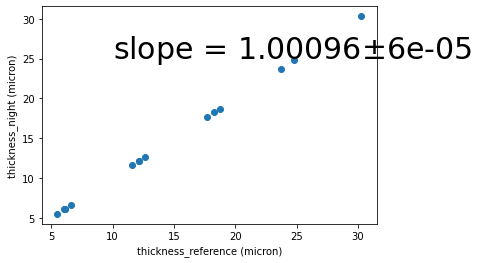

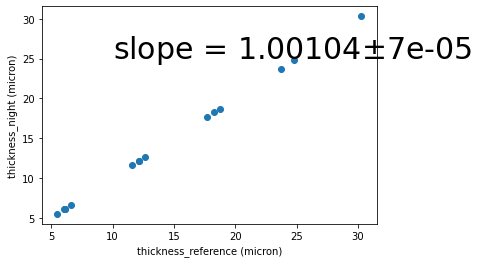

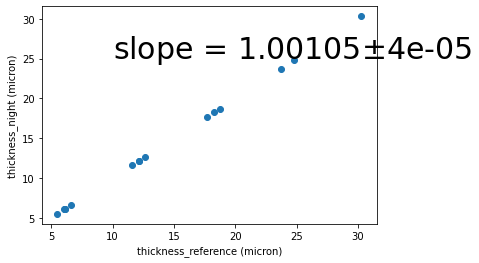

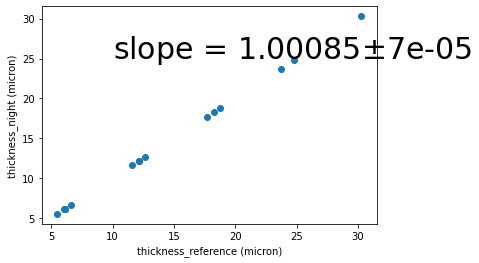

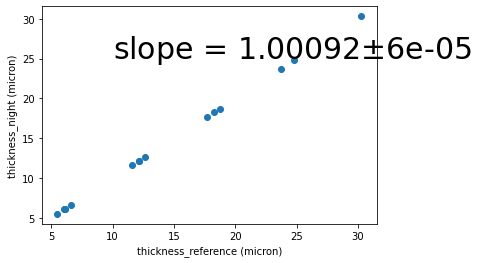

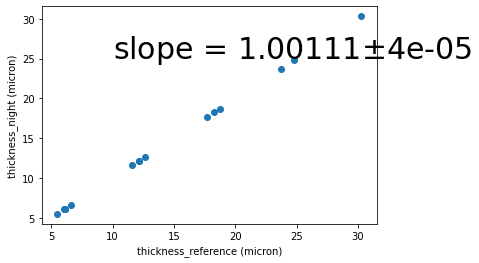

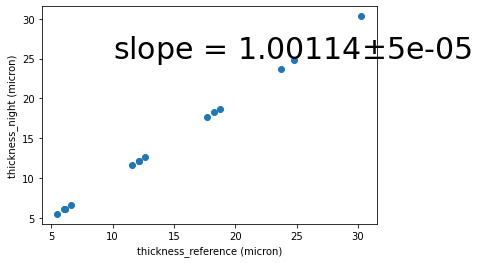

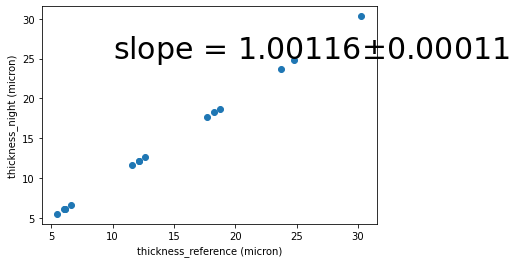

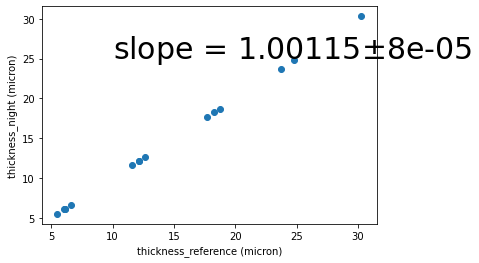

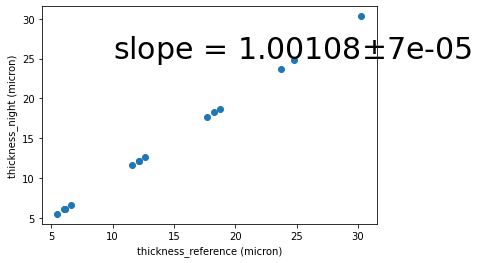

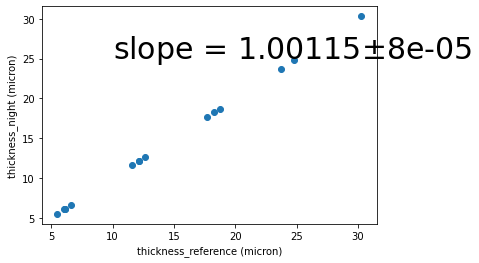

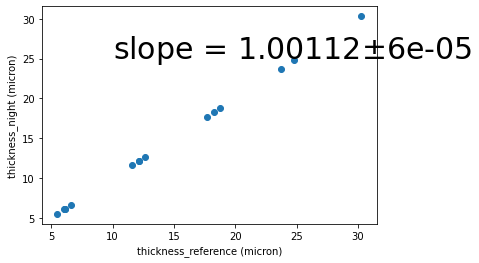

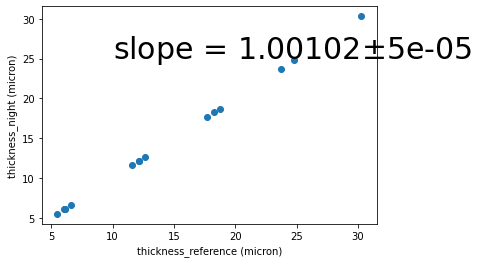

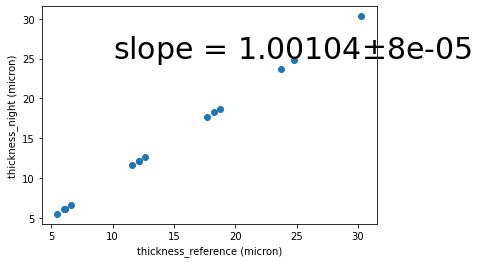

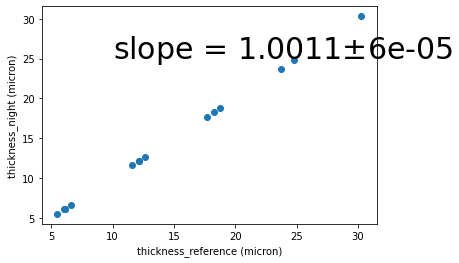

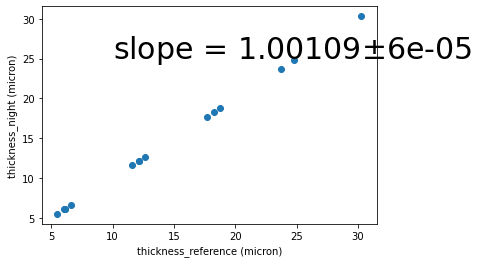

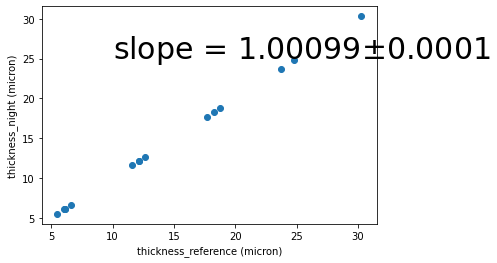

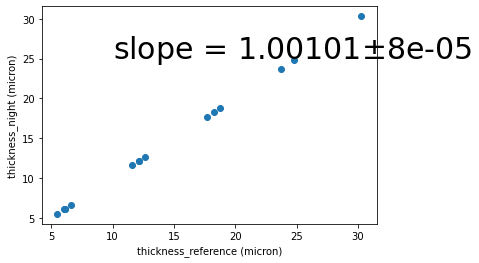

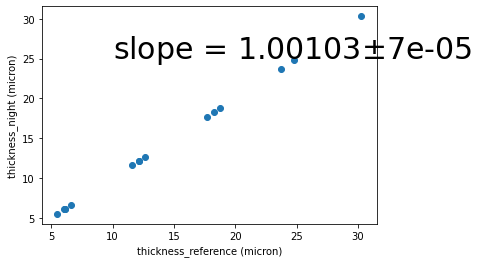

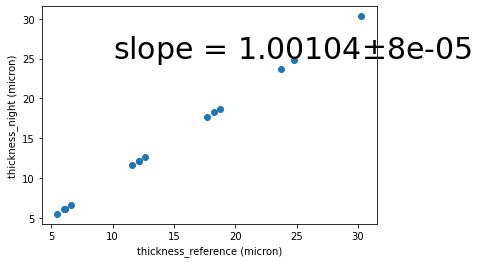

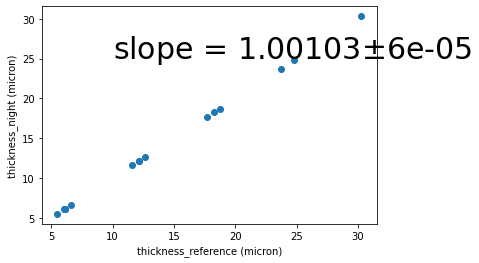

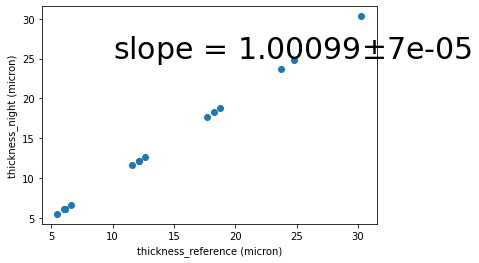

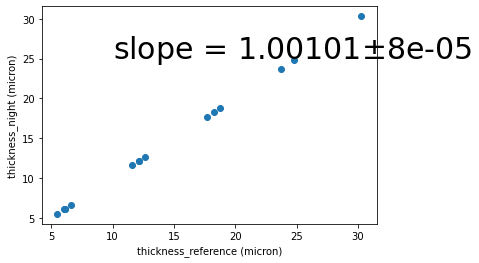

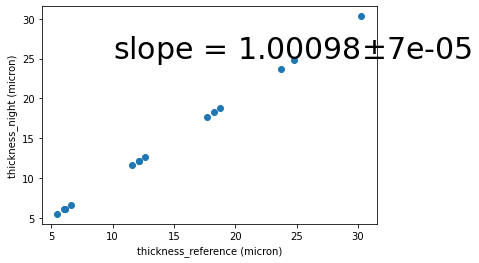

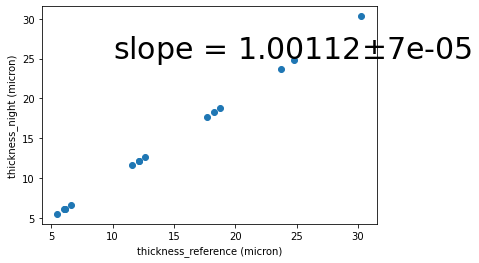

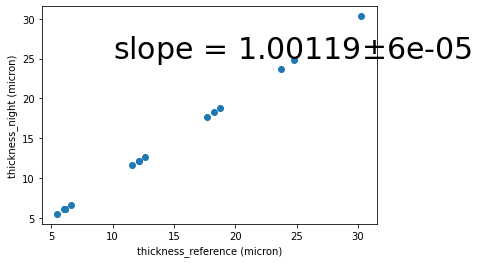

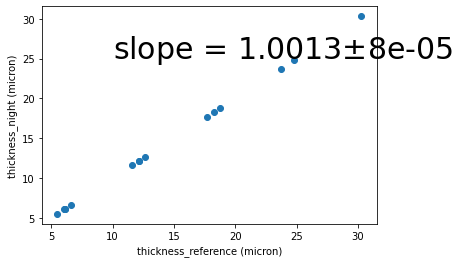

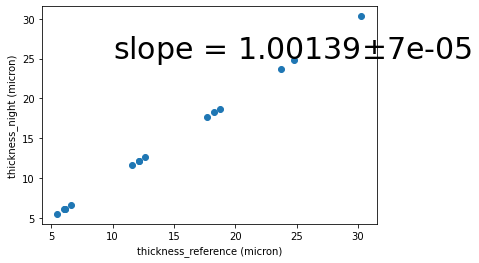

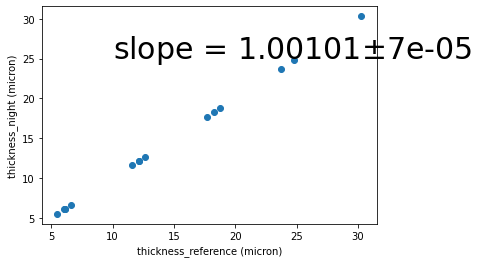

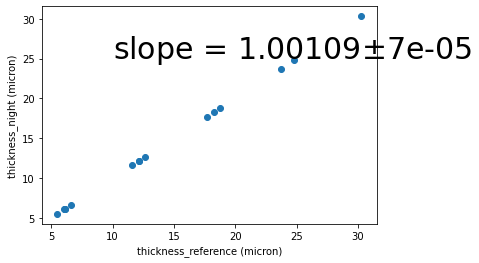

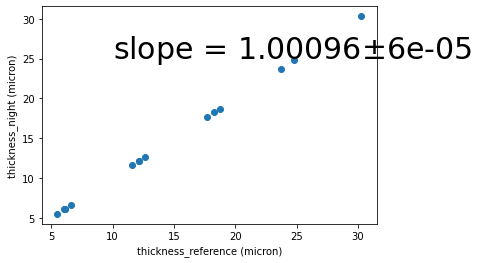

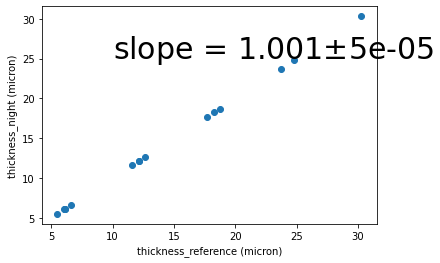

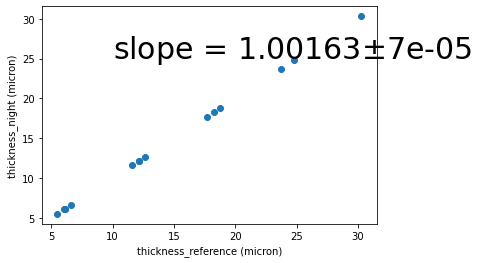

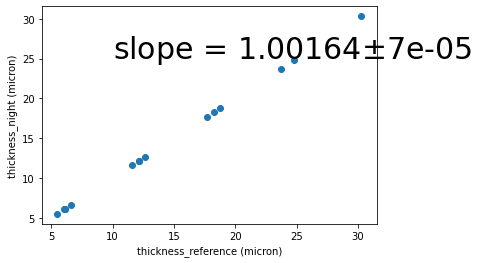

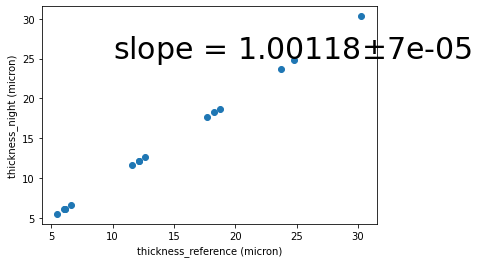

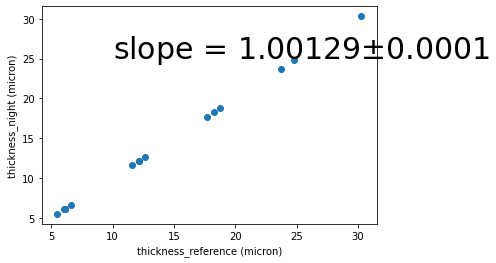

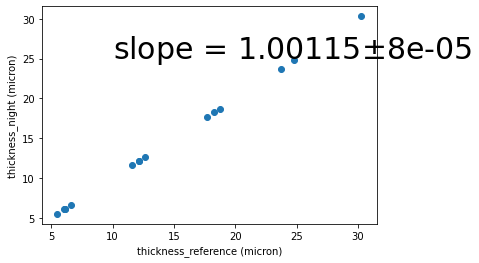

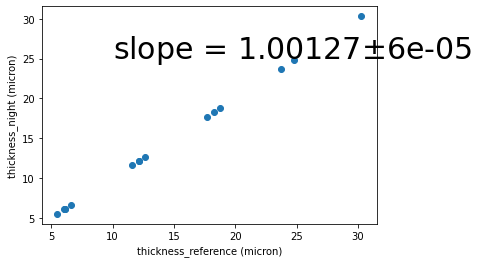

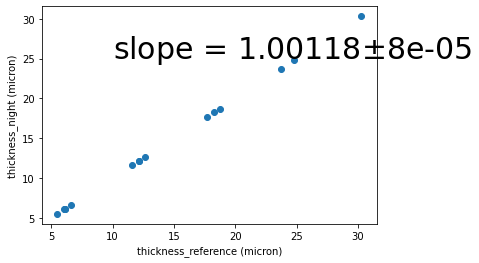

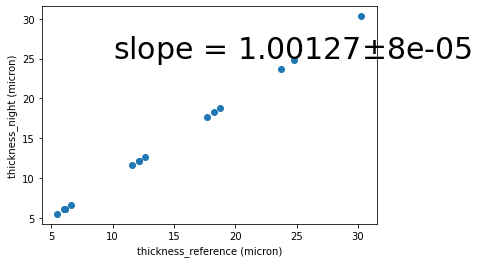

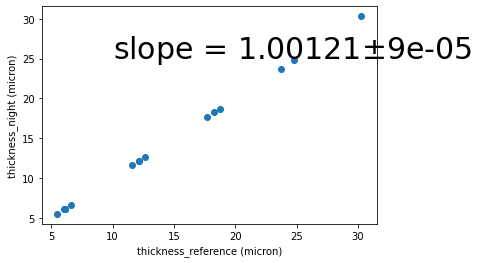

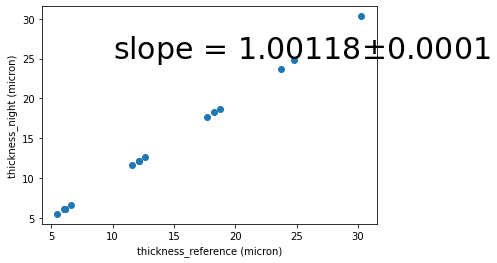

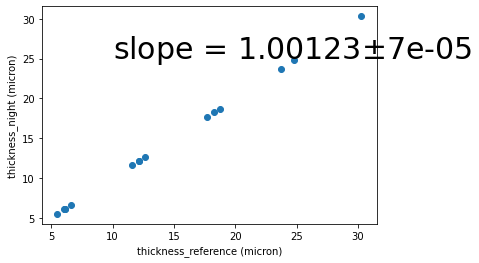

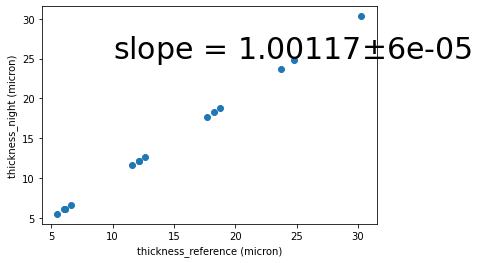

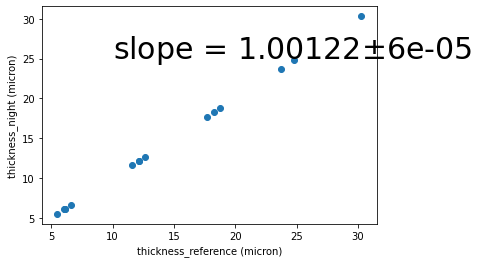

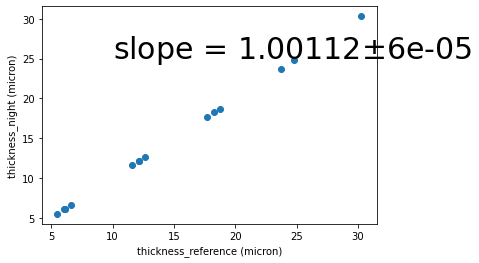

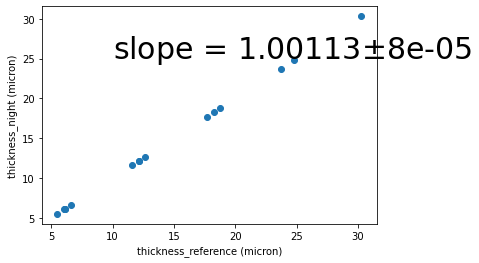

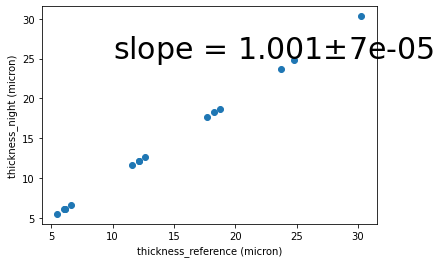

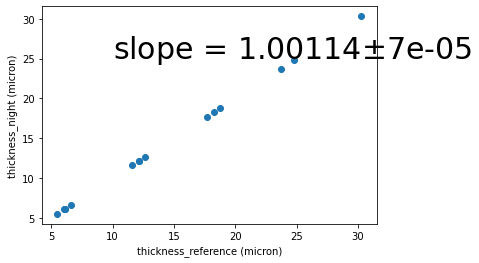

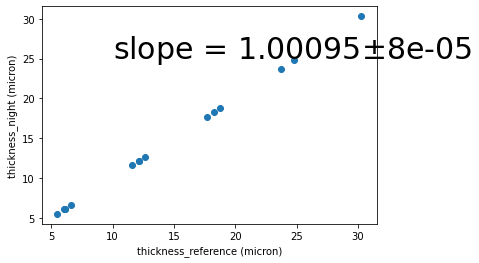

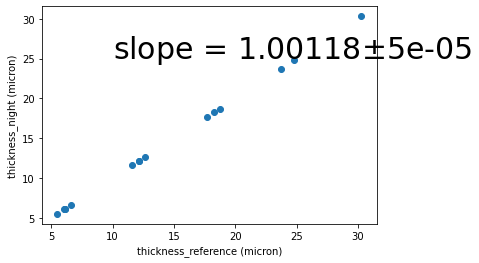

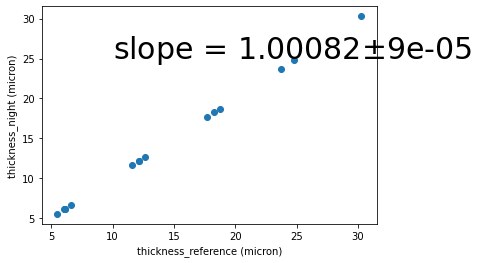

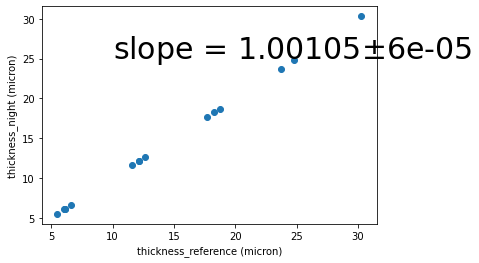

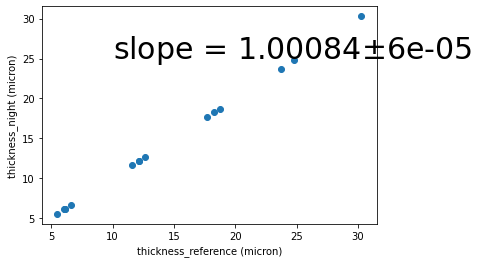

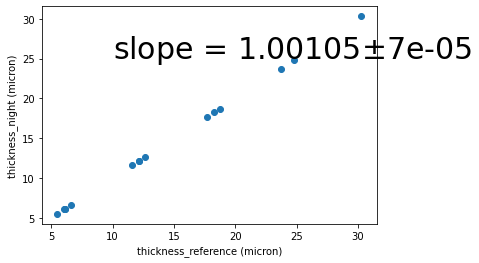

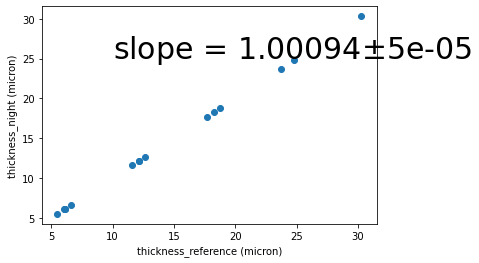

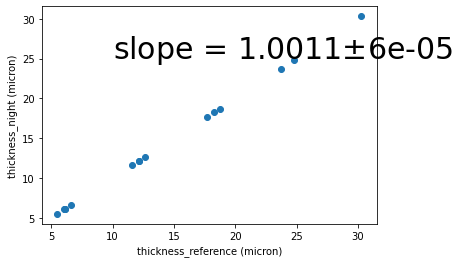

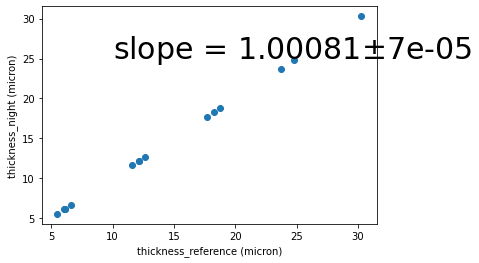

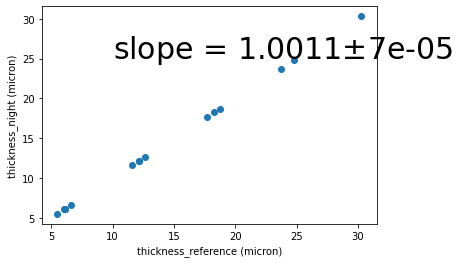

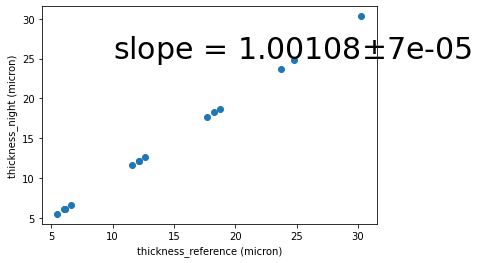

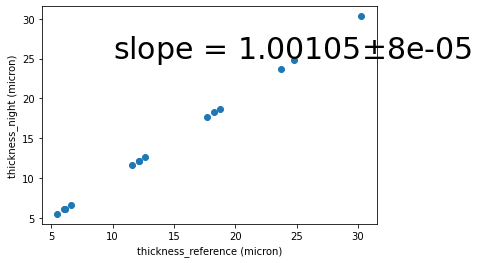

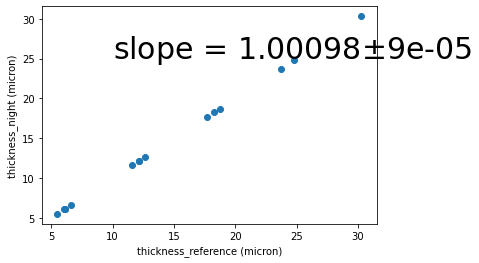

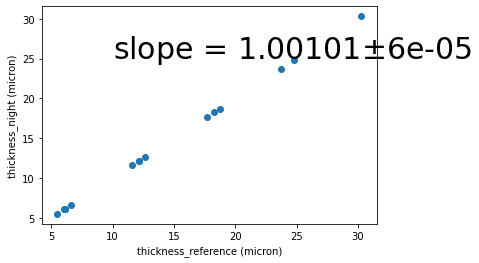

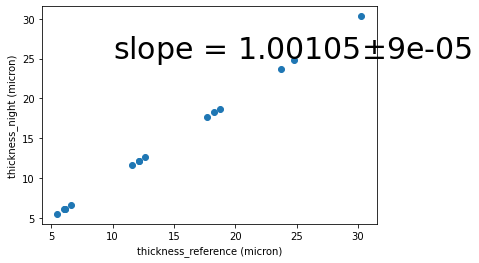

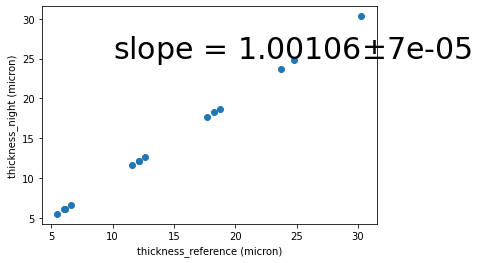

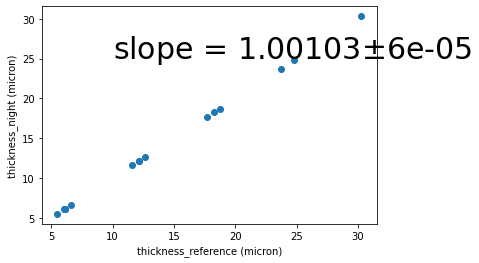

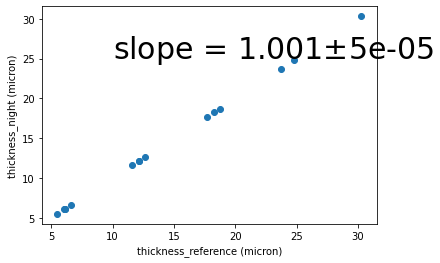

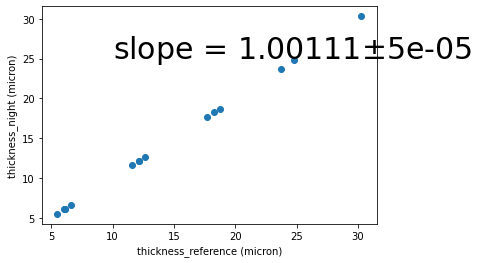

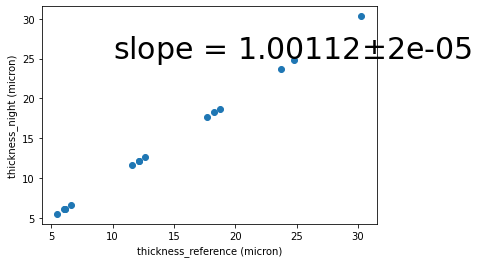

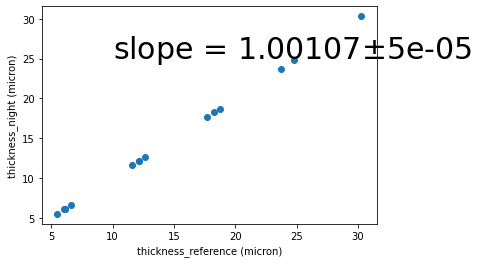

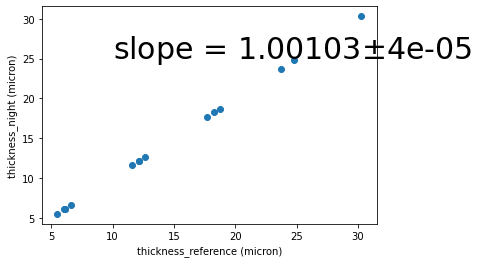

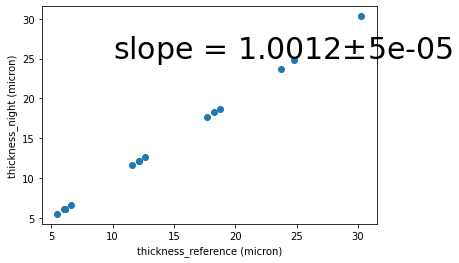

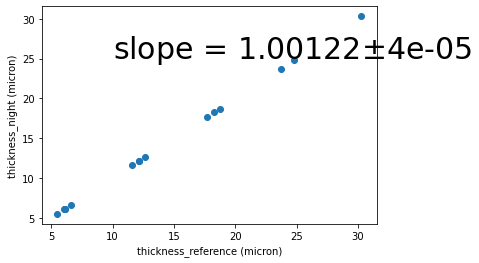

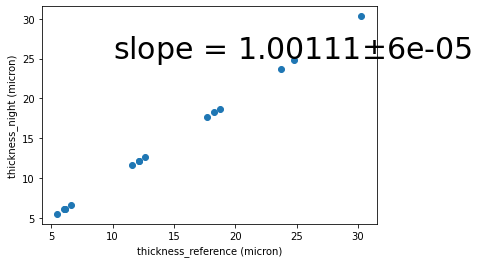

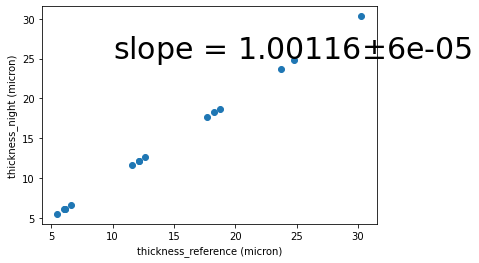

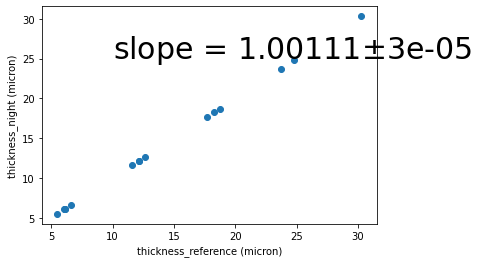

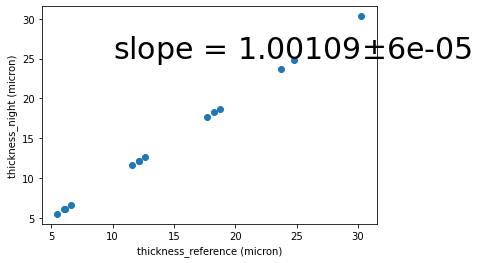

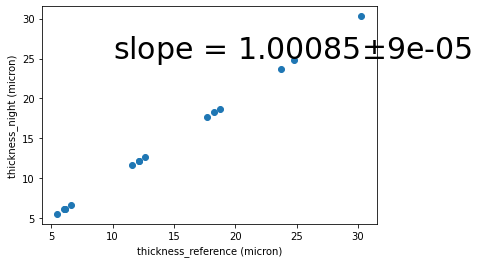

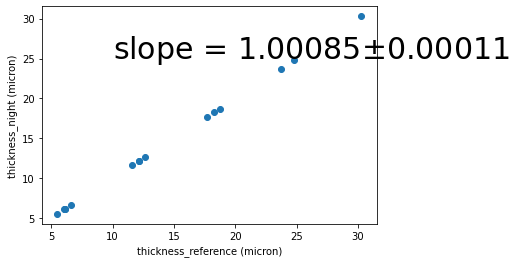

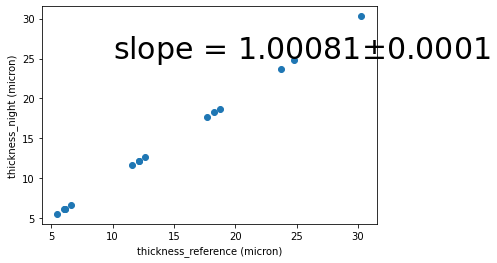

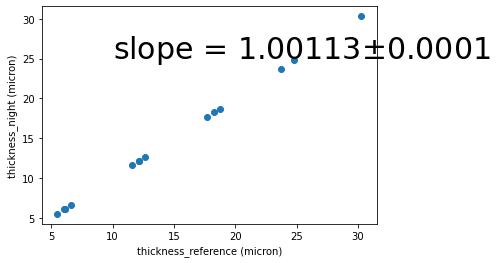

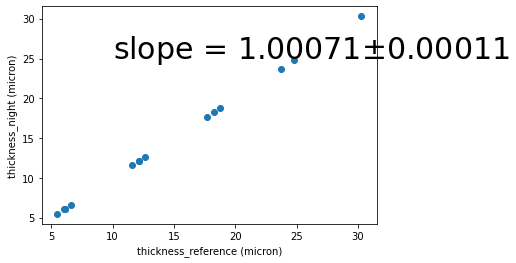

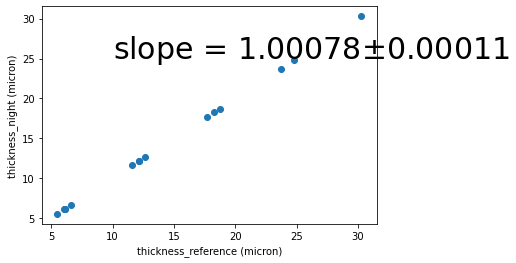

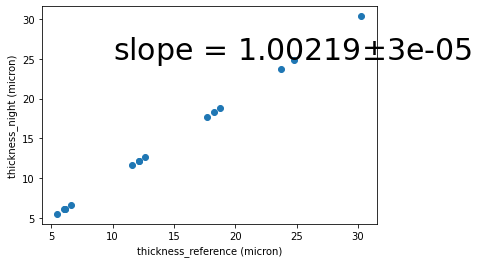

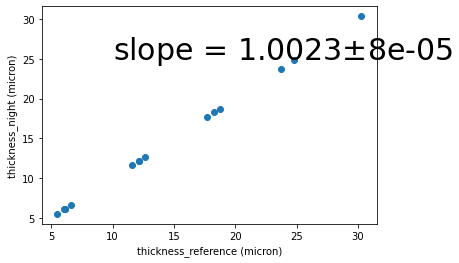

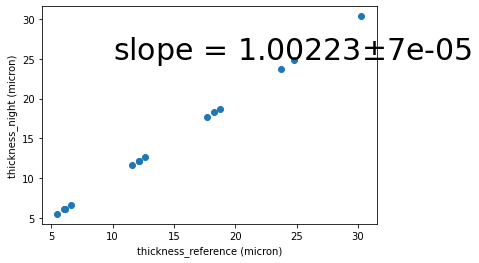

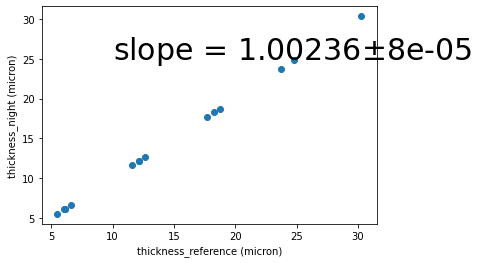

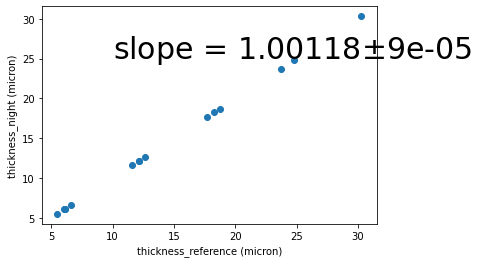

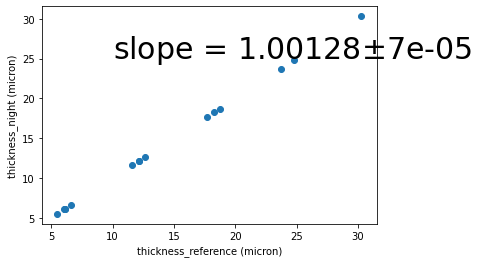

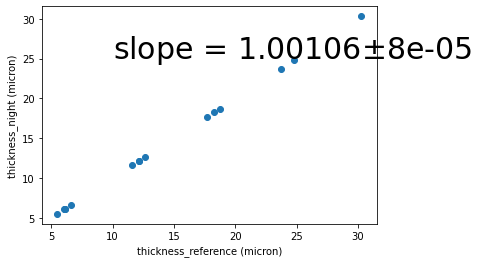

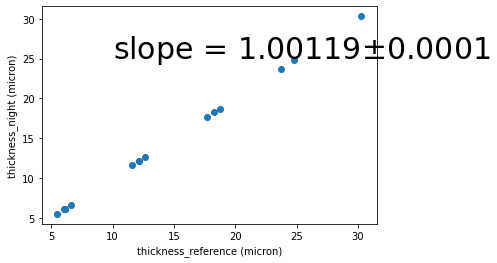

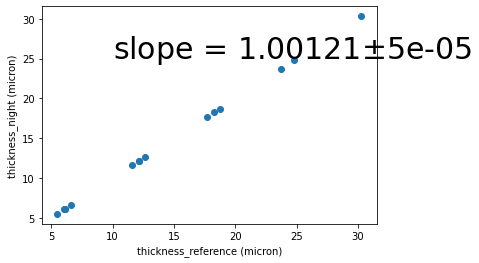

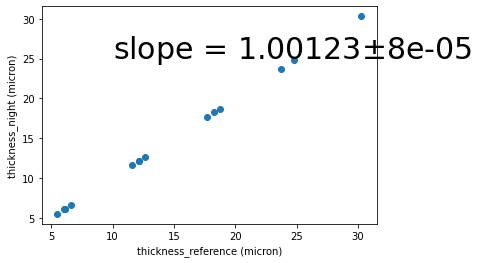

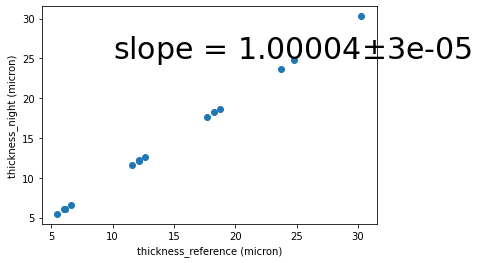

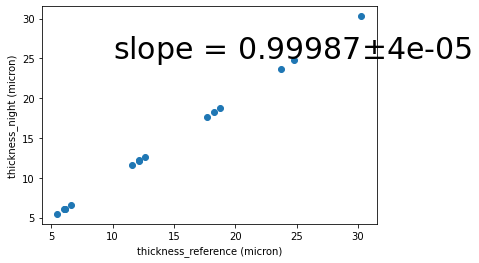

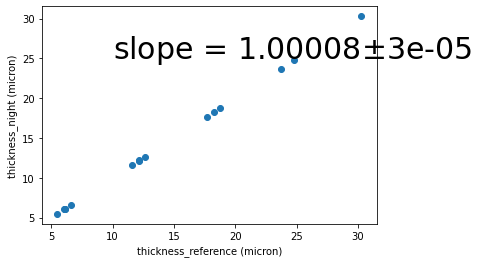

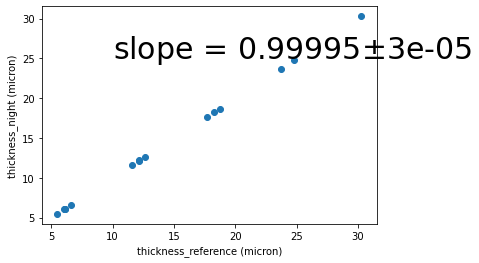

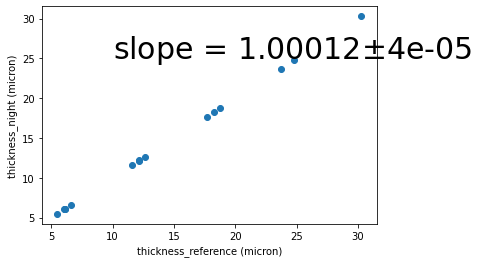

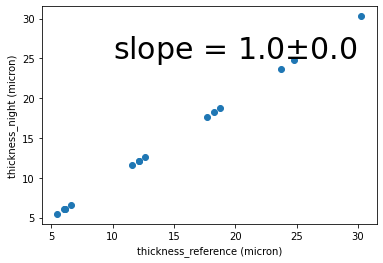

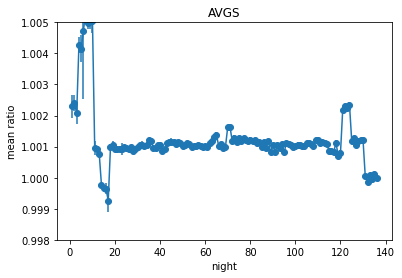

58024.2648 1.00229 0.00038
58025.3171 1.00241 0.00026
58027.3163 1.00207 0.00035
58158.3838 1.00427 0.00026
58223.1851 1.00415 0.00044
58266.197 1.00473 0.00219
58268.2025 1.00535 0.00031
58317.2192 1.00497 0.00017
58318.4983 1.00505 0.00026
58350.2382 1.00505 0.00041
58379.5389 1.00094 0.00022
58380.2955 1.00093 4e-05
58381.3062 1.00077 8e-05
58413.2345 0.99976 7e-05
58414.3902 0.99967 7e-05
58443.1559 0.99965 0.00018
58456.3646 0.99926 0.00036
58613.1612 1.001 9e-05
58614.2354 1.00106 0.00011
58635.0392 1.00092 6e-05
58636.0502 1.00092 7e-05
58637.0304 1.00094 7e-05
58691.7784 1.00093 0.00019
58693.0394 1.00098 8e-05
58694.1118 1.00097 8e-05
58695.108 1.00091 7e-05
58696.1895 1.00098 7e-05
58701.0959 1.00086 6e-05
58702.0698 1.00093 6e-05
58703.0429 1.00097 7e-05
58732.0251 1.00104 8e-05
58734.0702 1.00107 0.00011
58736.0409 1.00103 5e-05
58737.1113 1.00107 9e-05
58740.1045 1.00121 7e-05
58741.097 1.00117 7e-05
58751.042 1.00097 6e-05
58769.0238 1.00096 6e-05
58770.0177 1.00104 7e-05

In [9]:
## mean ratios and standard errors
mean_ratio = []
std = []

for item in diff:
    

    indices = ~np.isnan(item)
    item = item[indices]
    ratio = item / diff_avg[indices]
    
    #plt.plot(item,diff_avg[indices],'+')
    #plt.xlabel('night')
    #plt.ylabel('reference')
    #plt.show()
    
    ## measure slope for scale factor
    fit,V = np.polyfit(diff_avg[indices],item,1,cov='True')
    
    plt.plot(diff_avg[indices]*1e6,item*1e6,'o')
    plt.annotate('slope = %s$\pm$%s'%(np.around(fit[0],5),np.around(np.sqrt(np.diag(V))[0],5)),xy=(10,25),
                size=30)
    plt.xlabel('thickness_reference (micron)')
    plt.ylabel('thickness_night (micron)')
    plt.show()
    
    ## take ratios for scale factor
    #avg = np.average(ratio,weights=item)
    #variance = np.sqrt(np.average((ratio-avg)**2, weights=item))
    #avg = np.mean(ratio)
    #variance = np.std(ratio)/2

    mean_ratio.append(fit[0])
    std.append(np.sqrt(np.diag(V))[0])
    
    #print(np.mean(ratio),np.std(ratio))
    #print(avg,variance)
    
plt.errorbar(np.linspace(1,len(mean_ratio),len(mean_ratio)),mean_ratio,yerr=std,fmt='o-')
#plt.xticks(np.linspace(1,len(mean_ratio),len(mean_ratio)), dates)
plt.ylim(0.998,1.005)
plt.xlabel('night')
plt.ylabel('mean ratio')
plt.title('AVGS')
#plt.savefig("/Users/tgardne/etalon_epochs/etalon_fits/etalon_factors_fit_SKY.pdf")
plt.show()

for i,j,k in zip(dates,mean_ratio,std):
    print(i,np.around(j,5),np.around(k,5))

In [10]:
## save etalon factors to txt file
f = open("/Users/tgardner/etalon_epochs/etalon_fits/etalon_factors_fit.txt","w+")
f.write("# date(mjd) etalon_factor error\r\n")
for i,j,k in zip(dates,mean_ratio,std):
    f.write("%s %s %s\r\n"%(i,j,k))
f.close()

## New way of computing factors

In [11]:
factor = []
factor_err = []
dates = []

dirname = '/Users/tgardner/etalon_epochs/good_epochs/'
for file in os.listdir(dirname):
    
    if file.endswith("factor.txt"):
        filename = os.path.join(dirname, file)
        f = open(filename)
        lines = f.readlines()

        factor.append(float(lines[1].split()[1]))
        factor_err.append(float(lines[1].split()[2]))
        dates.append(float(lines[1].split()[0]))
        
        f.close()
        
factor = np.array(factor)
factor_err = np.array(factor_err)
dates = np.array(dates)

In [12]:
## sort arrays by date
idx = np.argsort(dates)

dates=dates[idx]
factor=factor[idx]
factor_err=factor_err[idx]

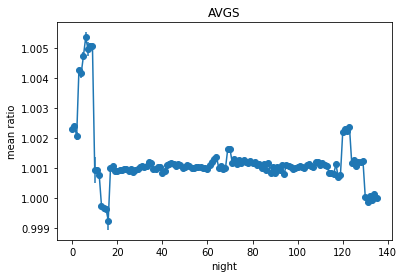

58024.264847144645 1.00139 5e-05
58025.317993232435 1.00151 7e-05
58027.316319108904 1.00118 0.00015
58158.38380553976 1.00336 4e-05
58223.1852060482 1.00323 0.00014
58266.197003364025 1.00457 0.00015
58268.20251068986 1.00449 0.00017
58317.2191748242 1.00405 0.00023
58318.49856539464 1.00412 0.00012
58350.2382478984 1.00413 8e-05
58379.538889341224 1.00018 0.00042
58380.29548006665 1.00002 2e-05
58381.306211942014 0.99985 6e-05
58413.234545447616 0.99884 2e-05
58414.39018010335 0.99876 1e-05
58443.15595626796 0.9988 4e-05
58456.36462156234 0.9982 0.00031
58613.16187702833 1.00081 1e-05
58614.23563346226 1.00087 1e-05
58635.03915346397 1.00072 1e-05
58636.0501669877 1.00073 1e-05
58637.030396839335 1.00074 1e-05
58691.77840584544 1.00002 9e-05
58693.03937675366 1.00078 1e-05
58694.11180007235 1.00077 1e-05
58695.10802125756 1.00072 1e-05
58696.189540769476 1.00078 1e-05
58701.09587206893 1.00067 1e-05
58702.06976040625 1.00074 0.0
58703.04294169111 1.00078 2e-05
58732.025071936936 1.00

In [13]:
#plt.errorbar(dates,factor,yerr=factor_err,fmt='o-',color='red')
plt.errorbar(np.arange(len(mean_ratio)),mean_ratio,yerr=factor_err,fmt='o-')
#plt.xticks(np.linspace(1,len(mean_ratio),len(mean_ratio)), dates)
#plt.ylim(0.998,1.005)
plt.xlabel('night')
plt.ylabel('mean ratio')
plt.title('AVGS')
plt.savefig("/Users/tgardner/etalon_epochs/etalon_fits/etalon_factors_fit.pdf")
plt.show()

for i,j,k in zip(dates,factor,factor_err):
    print(i,np.around(j,5),np.around(k,5))

In [14]:
## save etalon factors to txt file
f = open("/Users/tgardner/etalon_epochs/etalon_fits/etalon_factors_fit.txt","w+")
f.write("# date(mjd) etalon_factor error\r\n")
for i,j,k in zip(dates,factor,factor_err):
#for i,j,k in zip(dates,mean_ratio,factor_err):
    f.write("%s %s %s\r\n"%(i,j,k))
f.close()

## Test to see if correction needed for red vs blue half

In [ ]:
## removed blue --> (123.185,249.6715), red --> (122.8803,249.6906)
sep_blue_1 = np.array([92.5674,214.6906,72.7687,92.5436,148.8062])
pa_blue_1 = np.array([61.2674,178.4863,144.6649,261.6692,307.8134])
sep_red_1 = np.array([92.5547,214.6707,72.7460,92.5199,148.752])
pa_red_1 = np.array([61.269,178.4829,144.6615,261.672,307.8161])
err_maj_blue_1 = np.array([0.0263,0.0521,0.0136,0.017,0.0205])
err_min_blue_1 = np.array([0.0074,0.023,0.0075,0.0054,0.014])
err_pa_blue_1 = np.array([317.8133,274.301,43.3243,349.3381,351.934])
err_maj_red_1 = np.array([0.0234,0.0459,0.0113,0.0161,0.017])
err_min_red_1 = np.array([0.0063,0.0195,0.009,0.009,0.01])
err_pa_red_1 = np.array([323.8861,276.966,279.7823,328.5961,326.6108])

sep_blue_2 = np.array([88.5388,127.1066,72.8656,91.2396,147.8897,216.6043])
pa_blue_2 = np.array([129.2885,249.5741,143.9675,262.0055,307.6091,178.2299])
sep_red_2 = np.array([88.5363,127.0932,72.8519,91.228,147.8726,216.5747])
pa_red_2 = np.array([129.271,249.5769,143.9726,262.0015,307.6055,178.228])
err_maj_blue_2 = np.array([0.0267,0.0148,0.0237,0.02,0.0781,0.0416])
err_min_blue_2 = np.array([0.02,0.0092,0.0103,0.0184,0.0118,0.0322])
err_pa_blue_2 = np.array([355.8872,305.6755,77.5092,10.4781,70.1593,280.047])
err_maj_red_2 = np.array([0.0346,0.013,0.0244,0.022,0.0582,0.034])
err_min_red_2 = np.array([0.0143,0.0112,0.0104,0.0144,0.0208,0.0115])
err_pa_red_2 = np.array([58.8078,289.6674,69.2599,24.2834,64.3254,69.5021])

sep_blue_3 = np.array([96.1531,126.9668,72.5095,209.0307,150.9337])
pa_blue_3 = np.array([58.5216,249.2909,146.1972,178.9375,308.3701])
sep_red_3 = np.array([96.1407,126.9604,72.4975,208.9052,150.9288])
pa_red_3 = np.array([58.5164,249.2948,146.1984,178.9201,308.3686])
err_maj_blue_3 = np.array([0.0167,0.0246,0.0145,0.0348,0.0219])
err_min_blue_3 = np.array([0.005,0.0151,0.0084,0.0264,0.0141])
err_pa_blue_3 = np.array([309.3696,328.3166,51.381,86.5308,19.4287])
err_maj_red_3 = np.array([0.0197,0.024,0.0153,0.0471,0.0223])
err_min_red_3 = np.array([0.0087,0.0099,0.0052,0.0304,0.0097])
err_pa_red_3 = np.array([320.017,314.2238,77.1559,316.1762,328.1405])

etalon_red_1 = 1.000105165201447
etalon_blue_1 = 0.9999940776739505

sep_red = np.concatenate([sep_red_1,sep_red_2,sep_red_3])
sep_blue = np.concatenate([sep_blue_1,sep_blue_2,sep_blue_3])
pa_red = np.concatenate([pa_red_1,pa_red_2,pa_red_3])
pa_blue = np.concatenate([pa_blue_1,pa_blue_2,pa_blue_3])

err_maj_red = np.concatenate([err_maj_red_1,err_maj_red_2,err_maj_red_3])
err_maj_blue = np.concatenate([err_maj_blue_1,err_maj_blue_2,err_maj_blue_3])
err_min_red = np.concatenate([err_min_red_1,err_min_red_2,err_min_red_3])
err_min_blue = np.concatenate([err_min_blue_1,err_min_blue_2,err_min_blue_3])
err_pa_red = np.concatenate([err_pa_red_1,err_pa_red_2,err_pa_red_3])
err_pa_blue = np.concatenate([err_pa_blue_1,err_pa_blue_2,err_pa_blue_3])

x_red = -sep_red*np.cos((pa_red+90)*np.pi/180)
y_red = sep_red*np.sin((pa_red+90)*np.pi/180)
x_blue = -sep_blue*np.cos((pa_blue+90)*np.pi/180)
y_blue = sep_blue*np.sin((pa_blue+90)*np.pi/180)

x_err_red = abs(err_maj_red*np.sin(err_pa_red*np.pi/180))
y_err_red = abs(err_maj_red*np.cos(err_pa_red*np.pi/180))
x_err_blue = abs(err_maj_blue*np.sin(err_pa_blue*np.pi/180))
y_err_blue = abs(err_maj_blue*np.cos(err_pa_blue*np.pi/180))


x_red_new = []
y_red_new = []
x_blue_new = []
y_blue_new = []
for i,j,k,l,m,n,o,p in zip(x_red,y_red,x_blue,y_blue,x_err_red,y_err_red,x_err_blue,y_err_blue):
    xval_red = ufloat(i,m)
    yval_red = ufloat(j,n)
    xval_blue = ufloat(k,o)
    yval_blue = ufloat(l,p)    
    x_red_new.append(xval_red)
    y_red_new.append(yval_red)
    x_blue_new.append(xval_blue)
    y_blue_new.append(yval_blue)
x_red_new = np.array(x_red_new)
y_red_new = np.array(y_red_new)
x_blue_new = np.array(x_blue_new)
y_blue_new = np.array(y_blue_new)

#r_red = np.array([x_red,y_red])
#r_blue = np.array([x_blue,y_blue])
#err_red = np.array([x_err_red,y_err_red])
#err_blue = np.array([x_err_blue,y_err_blue])
r_red = np.array([x_red_new,y_red_new])
r_blue = np.array([x_blue_new,y_blue_new])

print(r_red.shape)
print(r_blue.shape)

In [ ]:
print(sep_red[0],pa_red[0])

plt.plot(x_red[0],y_red[0],'o')
plt.plot(0,0,'*')
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
ratio_seps = sep_blue / sep_red
ratio_pas = pa_blue / pa_red

etalon_ratio = etalon_red_1 / etalon_blue_1

plt.hist(ratio_seps, label='separations')
plt.hist(ratio_pas, label='position angles')
plt.vlines(1.0,0,10,linestyle='dashed')
plt.vlines(etalon_ratio,0,10,color='r',label = 'etalon ratio')
plt.title('2019Oct13+2019Nov11 - red half / blue half')
plt.legend()
plt.show()

In [ ]:
plt.plot(sep_red,ratio_seps,'+')
#plt.hlines(etalon_ratio,min(sep_red),max(sep_red),linestyle='dashed')
plt.xlabel('Sep (mas)')
plt.ylabel('sep_red / sep_blue')
plt.show()

In [ ]:
def cart2pol(x,y):
    x=-x
    r = (x**2 + y**2)**0.5
    theta = np.arctan2(y,x) * 180 / np.pi
    if theta>0 and theta<90:
        theta_new = theta+270
    if theta>90 and theta<360:
        theta_new = theta-90
    if theta<0:
        theta_new = 270+theta
    return(r,theta_new)

In [ ]:
c = r_blue - r_red
#c_err = np.sqrt(err_red**2+err_blue**2)

r_avg = (r_red + r_blue)/2
#r_avg_err = np.sqrt(err_red**2+err_blue**2)/2

mag = (r_avg[0]**2+r_avg[1]**2)**0.5
c_n = c / mag
#c_n_err = np.sqrt((c_err/c)**2+(r_avg_err/r_avg)**2)*c_n


## plot unit vectors
r_red_n = r_red / (r_red[0]**2+r_red[1]**2)**0.5
r_blue_n = r_blue / (r_blue[0]**2+r_blue[1]**2)**0.5
c_norm = c / (c[0]**2+c[1]**2)**0.5

In [ ]:
## get angles between vectors
angle_diff = []
for x,xn,y,yn in zip(c_norm[0],r_blue_n[0],c_norm[1],r_blue_n[1]):
    angle1 = cart2pol(x.nominal_value,y.nominal_value)[-1]
    angle2 = cart2pol(xn.nominal_value,yn.nominal_value)[-1]
    angle_diff.append(angle2-angle1)
angle_diff = np.array(angle_diff)
print(angle_diff)

In [ ]:
for i,j in zip(c[0],c[1]):
    plt.plot([0,i.nominal_value],[0,j.nominal_value],'-o')
plt.gca().set_aspect('equal')
plt.xlabel('dra (mas)')
plt.ylabel('ddec (mas)')
plt.show()

for i,j in zip(c_n[0],c_n[1]):
    plt.plot([0,i.nominal_value],[0,j.nominal_value],'-o')
plt.gca().set_aspect('equal')
plt.xlabel('dra / sep')
plt.ylabel('ddec / sep')
plt.show()

In [ ]:
c_mag = (c_n[0]**2+c_n[1]**2)**0.5

x = c_mag*np.cos(angle_diff*np.pi/180)
y = c_mag*np.sin(angle_diff*np.pi/180)

for i,j in zip(x,y):
    plt.errorbar(i.nominal_value,j.nominal_value,xerr=i.s,yerr=j.s,fmt='o')
plt.hlines(y=0,xmin=-10,xmax=10,linestyle='dashed')
plt.vlines(x=0,ymin=-10,ymax=10,linestyle='dashed')
plt.vlines(x=0.0001,ymin=-0.0005,ymax=0.0005,linestyle='dashed',color='r')
plt.annotate('etalon',xy=(1.2e-4,4e-4),color='red')
plt.xlim(-5e-4,5e-4)
plt.ylim(-5e-4,5e-4)
plt.gca().set_aspect('equal')
plt.title('Red / Blue Astrometry',size=15)
plt.xlabel('RADIAL DIRECTION --->', size=13)
plt.ylabel('fractional correction')
plt.savefig('astrometry_red_vs_blue.pdf')
plt.show()

In [ ]:
print(np.median(x))
print(np.median(y))